In [4]:
from fastai import *
from fastai.vision import *
from fastai.core import *
import torch

import warnings
warnings.filterwarnings('ignore')

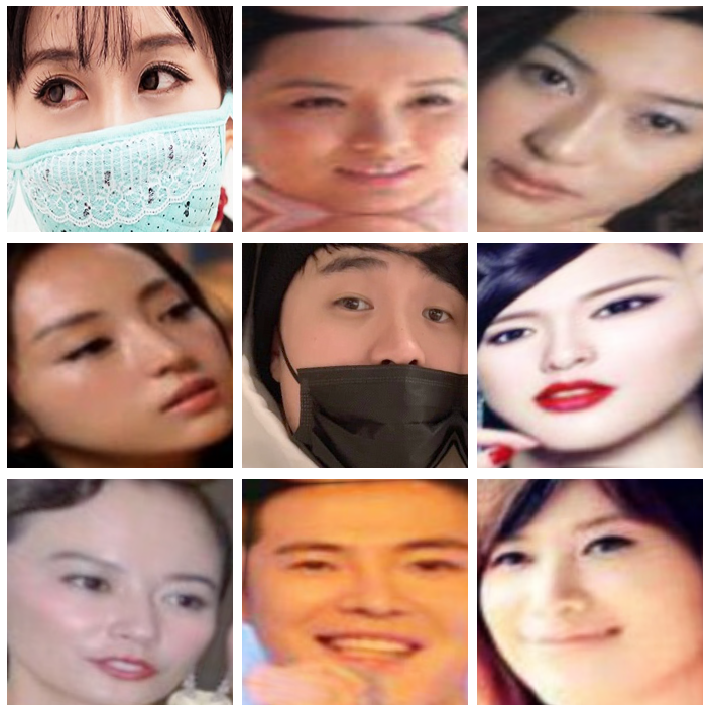

In [20]:
path = Path('data')
data = ImageDataBunch.from_folder(path,valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers = 0)
data.show_batch(rows=3, figsize=(10,10))

In [21]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [22]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [23]:
cycles=1
learn.fit_one_cycle(cycles, max_lr=slice(3e-4, 3e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.050757,0.026098,0.990288,43:04


In [24]:
%time interp = learn.interpret()

CPU times: user 3min 43s, sys: 22.5 s, total: 4min 5s
Wall time: 2min 59s


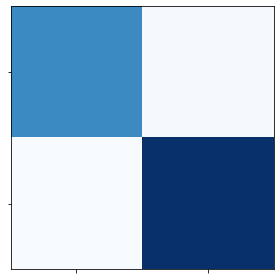

In [25]:
interp.plot_confusion_matrix()

In [26]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [28]:
def colab_img():
    from ipywidgets import widgets
    button_choice = widgets.Button(description="Predict", button_style='success')
    colab_img.output_variable = (widgets.Text())
    display(colab_img.output_variable)
    display(button_choice)
    def on_choice(b):
        j = Path(colab_img.output_variable.value)
        is_cat,_,probs = learn.predict(j)
        print(f"Is this a cat?: {is_cat}.") 
        print(f"Probability it's a cat: {probs[1].item():.6f}")
        button_choice.on_click(on_choice)

In [31]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())